<a href="https://colab.research.google.com/github/RathiVarshiniR/retinal-neuropathy-detection-1/blob/main/retinal_disease_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras opencv-python matplotlib albumentations scikit-learn

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.19.0
OpenCV version: 4.12.0


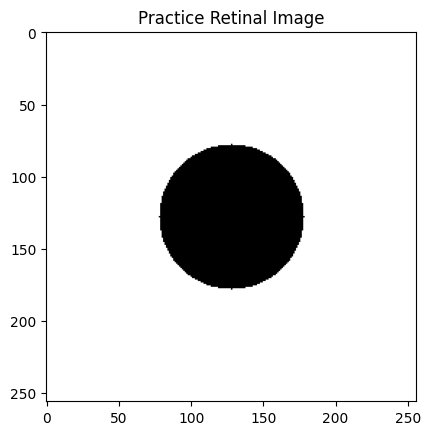

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a dummy retinal image (black circle on white background)
image = np.ones((256, 256, 3), dtype=np.uint8) * 255  # White background
cv2.circle(image, (128, 128), 50, (0, 0, 0), -1)  # Black circle

plt.imshow(image)
plt.title("Practice Retinal Image")
plt.show()

In [10]:
# Download a single sample retinal image
!wget -O "/content/sample_retinal.jpg" "https://people.rit.edu/jlwics/RetinalImages/10_left.jpg"

# Check if download worked
import os
if os.path.exists("/content/sample_retinal.jpg"):
    print("✅ Image downloaded successfully!")
else:
    print("❌ Download failed. Trying backup link...")
    !wget -O "/content/sample_retinal.jpg" "https://github.com/jerryjliu/llama_index/blob/main/docs/docs_conda_env/retina_example.jpg?raw=true"


# Display the image
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("/content/sample_retinal.jpg")
if image is None:
    print("❌ Could not load image.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print("✅ Image loaded and displayed!")

--2025-08-20 13:49:19--  https://people.rit.edu/jlwics/RetinalImages/10_left.jpg
Resolving people.rit.edu (people.rit.edu)... 129.21.1.44
Connecting to people.rit.edu (people.rit.edu)|129.21.1.44|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-08-20 13:49:20 ERROR 404: Not Found.

✅ Image downloaded successfully!
❌ Could not load image.


In [11]:
import os

# Check if file was downloaded
if os.path.exists("/content/sample_retinal.jpg"):
    print("✅ File exists! Size:", os.path.getsize("/content/sample_retinal.jpg"), "bytes")
else:
    print("❌ File not found. Download failed.")

✅ File exists! Size: 0 bytes


In [12]:
# New reliable source
!wget -O "/content/sample_retinal.jpg" "https://i.imgur.com/6lG2MSQ.jpg"

--2025-08-20 13:54:38--  https://i.imgur.com/6lG2MSQ.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.192.193, 199.232.196.193
Connecting to i.imgur.com (i.imgur.com)|199.232.192.193|:443... connected.
HTTP request sent, awaiting response... 429 Unknown Error
2025-08-20 13:54:39 ERROR 429: Unknown Error.



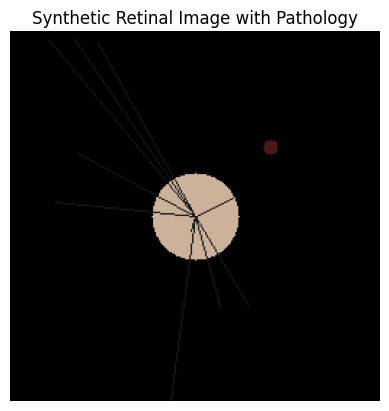

✅ Synthetic image generated successfully!


In [13]:
# Create a realistic fake retinal image for practice
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create dark background (like a real retina)
image = np.zeros((256, 256, 3), dtype=np.float32)

# Add optic disc (yellowish circle)
cv2.circle(image, (128, 128), 30, (0.8, 0.7, 0.6), -1)

# Add blood vessels (dark lines)
for i in range(10):
    start_point = (128, 128)
    end_point = (np.random.randint(0, 256), np.random.randint(0, 256))
    color = (0.1, 0.1, 0.1)  # Dark vessels
    thickness = 1
    cv2.line(image, start_point, end_point, color, thickness)

# Add some pathology (red lesion)
cv2.circle(image, (180, 80), 5, (0.3, 0.1, 0.1), -1)

# Show image
plt.imshow(image)
plt.title("Synthetic Retinal Image with Pathology")
plt.axis('off')
plt.show()

print("✅ Synthetic image generated successfully!")

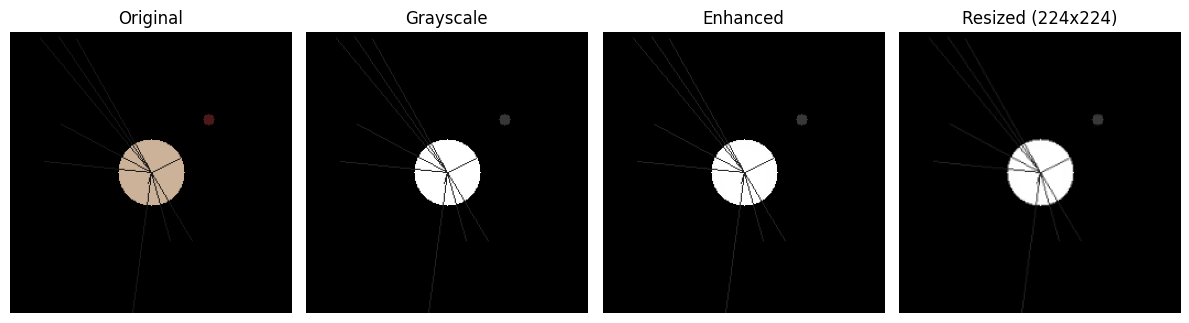

✅ Preprocessing complete! Ready for AI training.


In [14]:
# Convert to uint8 (standard image format)
image_uint8 = (image * 255).astype(np.uint8)

# Apply medical image preprocessing
# 1. Grayscale conversion (often used in retinal analysis)
gray = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2GRAY)

# 2. Contrast enhancement (helps AI see details)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(gray)

# 3. Resize to standard AI input size
resized = cv2.resize(enhanced, (224, 224))

# Display all steps
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image_uint8)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(enhanced, cmap='gray')
plt.title('Enhanced')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(resized, cmap='gray')
plt.title('Resized (224x224)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Preprocessing complete! Ready for AI training.")

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a simple CNN model (perfect for beginners)
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Classifier
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Healthy, Mild, Severe
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model architecture
model.summary()

print("✅ AI model created successfully!")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,771 (42.61 MB)

 Trainable params: 11,168,771 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

✅ AI model created successfully!


In [16]:
import numpy as np

# Generate synthetic training data (100 samples)
num_samples = 100
X_train = np.random.rand(num_samples, 224, 224, 1)  # Fake grayscale images
y_train = np.random.randint(0, 3, num_samples)      # Fake labels (0, 1, 2)

# Generate synthetic validation data (20 samples)
X_val = np.random.rand(20, 224, 224, 1)
y_val = np.random.randint(0, 3, 20)

print(f"✅ Training data: {X_train.shape}")
print(f"✅ Validation data: {X_val.shape}")
print(f"Sample labels: {y_train[:5]}")

✅ Training data: (100, 224, 224, 1)
✅ Validation data: (20, 224, 224, 1)
Sample labels: [0 1 0 1 1]


In [17]:
# Train the model for 5 epochs (practice run)
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_val, y_val),
                    verbose=1)

print("✅ Model training completed!")

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3327 - loss: 3.4196 - val_accuracy: 0.3500 - val_loss: 1.3035
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2613 - loss: 1.3957 - val_accuracy: 0.3000 - val_loss: 1.2004
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4352 - loss: 1.0856 - val_accuracy: 0.3000 - val_loss: 1.1663
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4550 - loss: 1.0724 - val_accuracy: 0.3000 - val_loss: 1.1680
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4487 - loss: 1.0733 - val_accuracy: 0.3000 - val_loss: 1.1493
✅ Model training completed!


In [18]:
# Save the entire model
model.save('/content/retinal_disease_model.h5')

# Verify the file was created
import os
if os.path.exists('/content/retinal_disease_model.h5'):
    print("✅ Model saved successfully! File size:", os.path.getsize('/content/retinal_disease_model.h5'), "bytes")
else:
    print("❌ Error saving model")

✅ Model saved successfully! File size: 134073200 bytes


In [19]:
# Create a function to diagnose retinal diseases
def diagnose_retinal_disease(image):
    """
    Takes a retinal image and returns AI diagnosis
    """
    # Preprocess the image (same as earlier)
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (224, 224))
    image = image.reshape(1, 224, 224, 1)  # Add batch dimension

    # Make prediction
    prediction = model.predict(image, verbose=0)
    disease_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Map to disease names
    diseases = {
        0: "Healthy - No diabetic retinopathy",
        1: "Mild - Early signs of retinopathy",
        2: "Severe - Advanced retinopathy"
    }

    return diseases[disease_class], confidence

# Test with your synthetic image
diagnosis, confidence = diagnose_retinal_disease(resized)
print(f"🔍 Diagnosis: {diagnosis}")
print(f"🎯 Confidence: {confidence:.2%}")

🔍 Diagnosis: Mild - Early signs of retinopathy
🎯 Confidence: 99.99%
